In [1]:
#Importing the needed library 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load datasets
train = pd.read_csv('C:/Users/USER/Downloads/Train.csv')
test  = pd.read_csv('C:/Users/USER/Downloads/Test.csv')
sample  = pd.read_csv('C:/Users/USER/Downloads/SampleSubmission.csv')

In [3]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [4]:
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [ ]:
#the columns as they are represented

columns={'form_field1':'Customer Creditworthiness score based on historical data',
                        'form_field2':'A score that measures the number and riskiness of credit enquiries made by a borrower',
                        'form_field3':'Severity of default by the borrower on any loan(s)',
                        'form_field4':'Severity of default by the borrower on auto loan(s)',
                        'form_field5':'Severity of default by the borrower on education loan(s)',
                        'form_field6':'Minimum of credit available on all credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)',
                        'form_field7':'Maximum of credit available on customer’s active credit lines (in NGN)',
                        'form_field8':'Maximum of credit available on all active credit cards that is automatically renewed as debts are paid off on the customer’s cards (in NGN)',
                        'form_field9':'Sum of available credit on credit cards that the borrower has missed 1 payment (in NGN)',
                        'form_field10':'Total amount of credit available on accepted credit lines (in NGN)',
                        'form_field11':'The amount of dues collected post-default where the due amount was more than 500 (in NGN)',
                        'form_field12':'Sum of the amount due on active credit cards (in NGN)',
                        'form_field13':'Annual amount paid towards all credit cards during the previous year (in NGN)',
                        'form_field14':'Annual income (in NGN)',
                        'form_field15':'The estimated market value of a property owned/used by the borrower (in NGN)',
                        'form_field16':' Number of active credit card that is automatically renewed as debts are paid off on which full credit limit is utilized by the borrower',
                        'form_field17':'Number of active credit cards on which full credit limit is utilized by the borrower',
                        'form_field18':'Number of active credit lines on which full credit limit is utilized by the borrower',
                        'form_field19':'Number of active credit cards on which at least 75% credit limit is utilized by the borrower',
                        'form_field20':'Number of active credit lines on which at least 75% credit limit is utilized by the borrower',
                        'form_field21':'Average utilization of active revolving credit card loans (%)',
                        'form_field22':'Average utilization of line on all active credit lines activated in last 2 years (%)',
                        'form_field23':'Average utilization of line on all active credit cards activated in last 1 year (%)',
                        'form_field24':'Average utilization of line on credit cards on which the borrower has missed 1 payment during the last 6 months (%)',
                        'form_field25':'Average tenure of active revolving credit cards (in days)',
                        'form_field26':'Tenure of oldest credit card among all active credit cards (in days)',
                        'form_field27':'Tenure of oldest revolving credit card among all active revolving credit cards (in days)',
                        'form_field28':'Number of days since last missed payment on any credit line',
                        'form_field29':'Tenure of the oldest credit line (in days)',
                        'form_field30':'Maximum tenure on all auto loans (in days)',
                        'form_field31':'Maximum tenure on all education loans (in days)',
                        'form_field32':'Sum of tenures (in months) of active credit cards',
                        'form_field33':'Sum of tenures (in months) of active credit cards',
                        'form_field34':'Number of active credit lines over the last 6 months on which the borrower has missed 1 payment',
                        'form_field35':'Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment',
                        'form_field36':'Number of active credit lines',
                        'form_field37':'Number of credit cards with an active tenure of at least 2 years',
                        'form_field38':'Number of credit lines activated in the last 2 years',
                        'form_field39':'Number of credit lines on which the borrower has current delinquency',
                        'form_field40':'Utilization of line on active education loans (%)',
                        'form_field41':'Utilization of line on active auto loans (%)',
                        'form_field42':'Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.',
                        'form_field43':'Number of credit lines on which the borrower has never missed a payment in the,last 2 years, yet considered as high-risk loans based on the market prediction of the economic scenario',
                        'form_field44':'Ratio of the maximum amount due on all active credit lines and the sum of amounts due on all active credit lines',
                        'form_field45':'Number of mortgage loans on which the borrower has missed 2 payments',
                        'form_field46':'Number of auto loans on which the borrower has missed 2 payments',
                        'form_field47':'Type of product that the applicant applied for. (C = Charge; L = Lending)',
                        'form_field48':'Undefined Variable',
                        'form_field49':'Undefined Variable',
                        'form_field50':'Ratio of the minimum amount due on all active credit lines and the sum of amounts due on all active credit lines',
                        'default_status':'defaulted or not.(yes:1, no: 0)'})


In [5]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [7]:
test.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [8]:
train.dtypes

Applicant_ID       object
form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field31      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38

In [9]:
train['default_status'].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

In [10]:
train['default_status'].value_counts(normalize=True)

no     0.755089
yes    0.244911
Name: default_status, dtype: float64

In [11]:
train.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

In [12]:
train['form_field47'].fillna(train['form_field47'].mode()[0], inplace=True)

In [13]:
train.fillna(train.median(), inplace=True)

In [14]:
train.isnull().sum()

Applicant_ID      0
form_field1       0
form_field2       0
form_field3       0
form_field4       0
form_field5       0
form_field6       0
form_field7       0
form_field8       0
form_field9       0
form_field10      0
form_field11      0
form_field12      0
form_field13      0
form_field14      0
form_field15      0
form_field16      0
form_field17      0
form_field18      0
form_field19      0
form_field20      0
form_field21      0
form_field22      0
form_field23      0
form_field24      0
form_field25      0
form_field26      0
form_field27      0
form_field28      0
form_field29      0
form_field30      0
form_field31      0
form_field32      0
form_field33      0
form_field34      0
form_field35      0
form_field36      0
form_field37      0
form_field38      0
form_field39      0
form_field40      0
form_field41      0
form_field42      0
form_field43      0
form_field44      0
form_field45      0
form_field46      0
form_field47      0
form_field48      0
form_field49      0


In [15]:
test['form_field47'].fillna(test['form_field47'].mode()[0], inplace=True)

In [16]:
test.fillna(test.median(), inplace=True)

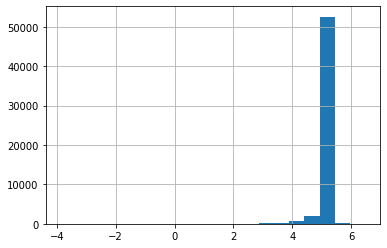

In [17]:
train['form_field40_log'] =np.log(train['form_field40'])
train['form_field40_log'].hist(bins=20)
test['form_field40_log'] =np.log(test['form_field40'])

In [18]:
train = train.drop('Applicant_ID',axis=1)
test = test.drop('Applicant_ID',axis=1)

In [19]:
train = train.drop('form_field48',axis=1)
test = test.drop('form_field48',axis=1)

In [20]:
train = train.drop('form_field32',axis=1)
test = test.drop('form_field32',axis=1)

In [21]:
train = train.drop('form_field47',axis=1)
test = test.drop('form_field47',axis=1)

In [22]:
train = train.drop('form_field49',axis=1)
test = test.drop('form_field49',axis=1)

In [23]:
train = train.drop('form_field33',axis=1)
test = test.drop('form_field33',axis=1)

In [24]:
X = train.drop('default_status',1)
y = train.default_status

In [25]:
X =pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [26]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
!pip install imblearn

In [28]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)
x_train_balanced = pd.DataFrame(x_train_balanced, columns=x_train.columns)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ElasticNet, BayesianRidge

In [30]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8039285714285714


In [31]:
RCF_algo = RandomForestClassifier()
for i in range(8):
    model_rcf     = RCF_algo.fit(x_train, y_train)
    ratings = model_rcf.score(x_test, y_test)
    print(i, ratings)

0 0.7999107142857143
1 0.7991964285714286
2 0.8
3 0.7994642857142857
4 0.8008035714285714
5 0.7983035714285714
6 0.8036607142857143
7 0.8016964285714285


In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
pred_test =model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7622321428571428

In [35]:
i=1
mean=0
kf=StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl= X.loc[train_index],X.loc[test_index]
    ytr,yvl= y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean +=score
    print ('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
    print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold5
accuracy_score 0.7529464285714286

 Mean Validation Accuracy 0.7529464285714286

2 of kfold5
accuracy_score 0.7533035714285714

 Mean Validation Accuracy 0.753125

3 of kfold5
accuracy_score 0.755625

 Mean Validation Accuracy 0.7539583333333333

4 of kfold5
accuracy_score 0.7525

 Mean Validation Accuracy 0.75359375

5 of kfold5
accuracy_score 0.7541071428571429

 Mean Validation Accuracy 0.7536964285714285


In [36]:
from sklearn import tree

i=1
mean=0
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model= tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean +=score
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    print('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.7224107142857142

 Mean Validation Accuracy 0.7224107142857142

2 of kfold 5
accuracy_score 0.72

 Mean Validation Accuracy 0.7212053571428572

3 of kfold 5
accuracy_score 0.7194642857142857

 Mean Validation Accuracy 0.7206250000000001

4 of kfold 5
accuracy_score 0.72375

 Mean Validation Accuracy 0.72140625

5 of kfold 5
accuracy_score 0.7148214285714286

 Mean Validation Accuracy 0.7200892857142858


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
i=1
mean=0
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model= RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean +=score
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    print('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.8042857142857143

 Mean Validation Accuracy 0.8042857142857143

2 of kfold 5
accuracy_score 0.7947321428571429

 Mean Validation Accuracy 0.7995089285714285

3 of kfold 5
accuracy_score 0.7930357142857143

 Mean Validation Accuracy 0.7973511904761904

4 of kfold 5
accuracy_score 0.7971428571428572

 Mean Validation Accuracy 0.7972991071428571

5 of kfold 5
accuracy_score 0.8017857142857143

 Mean Validation Accuracy 0.7981964285714286


In [39]:
from xgboost import XGBClassifier


In [40]:
i=1
mean=0
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model= XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean +=score
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    print('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.803125

 Mean Validation Accuracy 0.803125

2 of kfold 5
accuracy_score 0.7953571428571429

 Mean Validation Accuracy 0.7992410714285714

3 of kfold 5
accuracy_score 0.7961607142857143

 Mean Validation Accuracy 0.7982142857142858

4 of kfold 5
accuracy_score 0.7974107142857143

 Mean Validation Accuracy 0.7980133928571429

5 of kfold 5
accuracy_score 0.7985714285714286

 Mean Validation Accuracy 0.798125


In [41]:
pred_test = model.predict_proba(test)[:,1]

In [42]:
submission = pd.read_csv('C:/Users/USER/Downloads/SampleSubmission.csv')


In [43]:
submission['default_status'].replace(0,'N', inplace=True)
submission['default_status'].replace(1,'Y', inplace=True)

In [45]:
pd.DataFrame(submission,columns=['Applicant_ID','default_status']).to_csv('Desktop/last_submission.csv',index=False)